In [ ]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

## Data Scedasticity Test

### User Note: Understanding Gnostic Scedasticity

**Gnostic Scedasticity Test for Homoscedasticity and Heteroscedasticity**

This class provides a method to check for homoscedasticity and heteroscedasticity in data, inspired by fundamental principles of Mathematical Gnostics rather than standard statistical tests.

**Key Differences from Standard Methods:**
*   **Scale Parameter ($S$) vs. Variance:** Instead of checking for equal variances (as in Bartlett's or Levene's tests), Gnostics analyzes the **Scale Parameter ($S$)**. $S$ determines the "curvature" of the data space and the width of the probability kernel for each datum.
*   **Data-Driven Decision:** Standard statistics often assumes homoscedasticity (constant variance) a priori. Gnostics calculates two distinct models—one assuming a constant $S$ and one allowing a variable $S$—and compares their quality to let the data decide which structure is more accurate.
*   **Local vs. Global:** While homoscedasticity implies a global constant spread, Gnostic heteroscedasticity calculates an individual scale parameter for *each* data point, allowing the model to adapt to local changes in volatility.

#### Gnostic Theory Foundation
In Gnostic theory, scedasticity is not just a statistical property but a description of how uncertainty is distributed across the data sample.

1.  **Homoscedasticity (Constant $S$):**
    *   **Concept:** The data sample is treated as having a uniform "spread" or uncertainty throughout. The space of uncertain data has a constant curvature.
    *   **Behavior:** This results in a more rigid distribution function. It is useful when the process generating the data is stable and measuring conditions are unchanging.

2.  **Heteroscedasticity (Variable $S$):**
    *   **Concept:** The uncertainty varies locally. Each datum has its own "personal" variability. This corresponds to a space with variable curvature, where the metric changes depending on the data value.
    *   **Behavior:** This results in a highly flexible distribution function. It is essential for analyzing complex systems (e.g., environmental monitoring or financial markets) where volatility changes over time or across different magnitudes of data.

#### Interpretation and Usage
The test operates on the principle of **"Letting data speak for themselves"**. The algorithm runs the analysis twice:
1.  **Fixed $S$ (Homoscedastic):** `varS = False`
2.  **Variable $S$ (Heteroscedastic):** `varS = True`

**The Criterion:** It compares the **Information Quality** (or fitting error) of both models. If the variable-$S$ model provides a significantly better fit (higher fidelity, lower entropy), the data is declared **Heteroscedastic**. If the improvement is negligible, the simpler **Homoscedastic** model is preferred to avoid over-fitting.


## Example 1

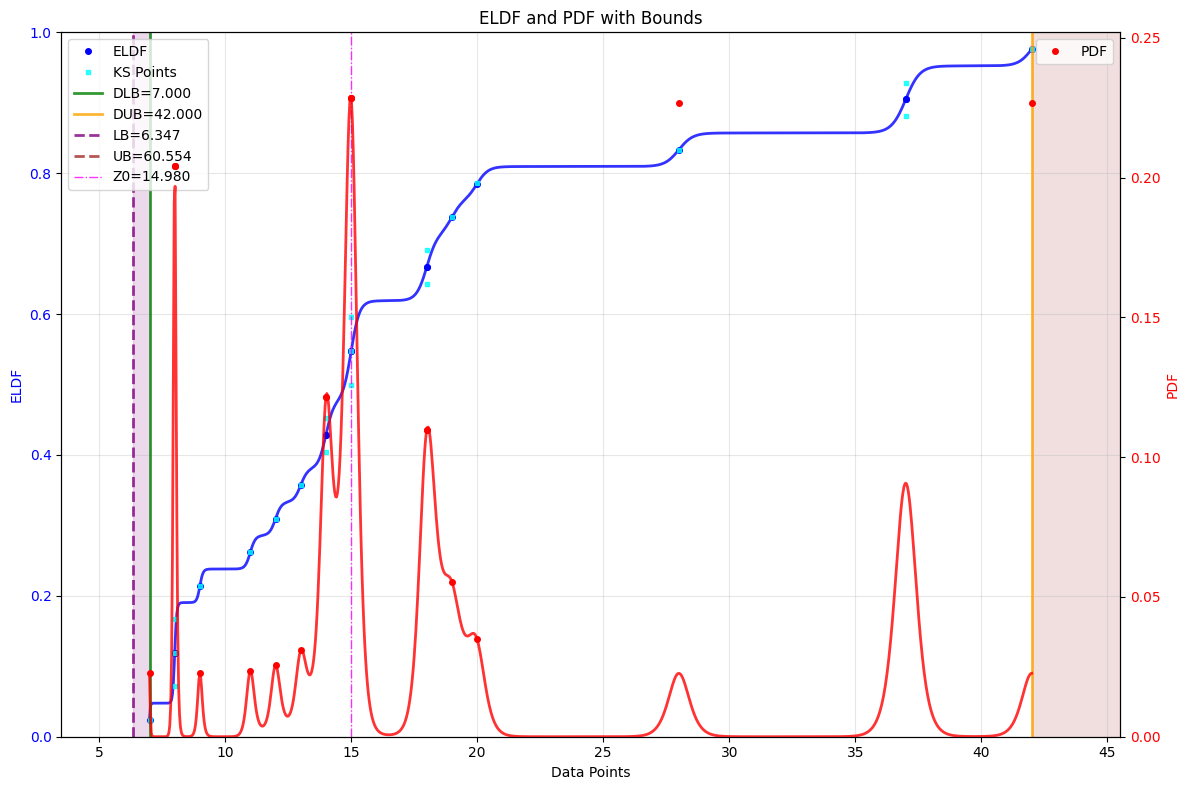

Is the data homoscedastic?  False


{'scedasticity': 'heteroscedastic',
 'scale_parameter': array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
        0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.01, 0.01, 0.01, 0.01]),
 'S_local': np.float64(1.2548785448500057),
 'S_global': 2.5812929064365195}

In [ ]:
# import
import numpy as np
from machinegnostics.magcal import DataScedasticity

# Example data - stack-loss data
y = np.array([ 7,  8,  8,  8,  9, 11, 12, 13, 14, 14, 15, 15, 15, 18, 18, 19, 20, 28, 37, 37, 42])

# Step 1: get you ELDF object
from machinegnostics.magcal import ELDF

eldf = ELDF(varS=True, verbose=False)
eldf.fit(data=y, plot=True)

# Step 2: create a DataScedasticity object
ds = DataScedasticity(gdf=eldf, verbose=False)

# fit the data
is_homoscedastic = ds.fit()
print("Is the data homoscedastic? ", is_homoscedastic)
# check results
ds.results()

## Example 2

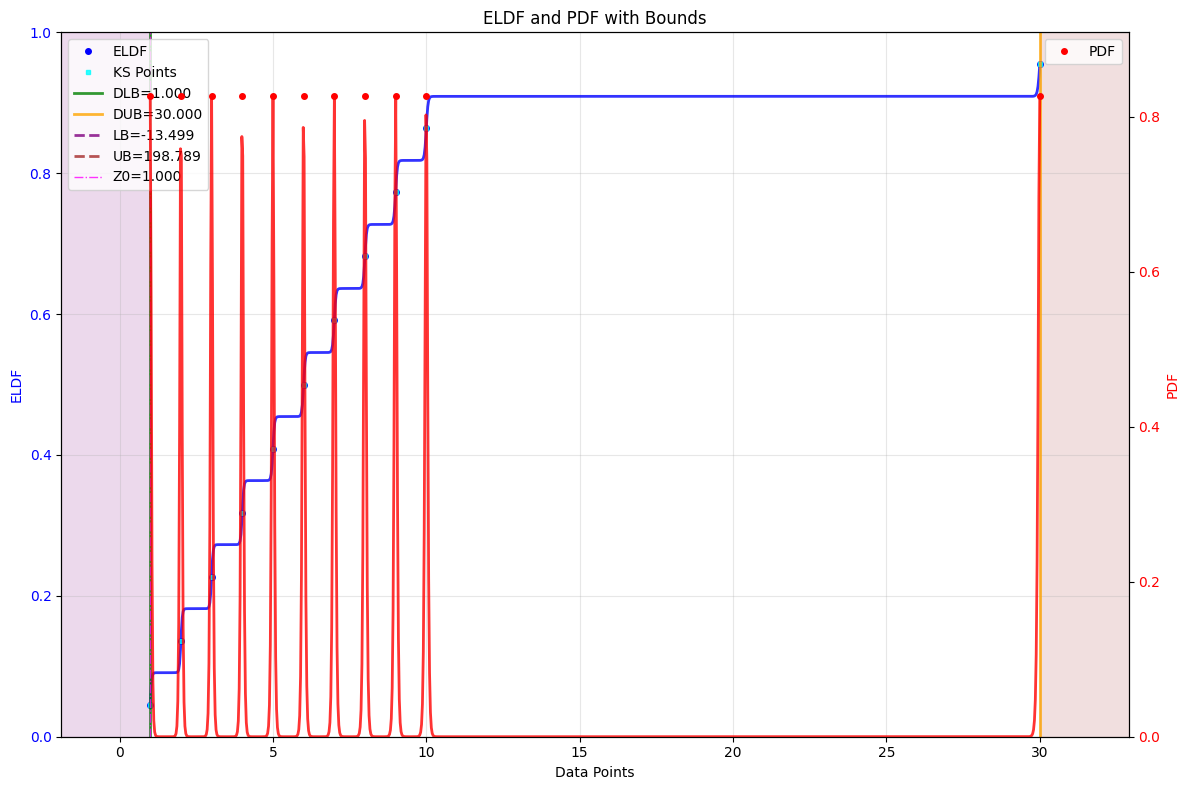

Is the data homoscedastic?  True


{'scedasticity': 'homoscedastic',
 'scale_parameter': array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]),
 'S_local': np.float64(0.7222571129871884),
 'S_global': 0.703809969933205}

In [5]:
# import
import numpy as np
from machinegnostics.magcal import DataScedasticity

# Example data - stack-loss data
y = np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30])

# Step 1: get you ELDF object
from machinegnostics.magcal import ELDF

eldf = ELDF(varS=True, verbose=False)
eldf.fit(data=y, plot=True)

# Step 2: create a DataScedasticity object
ds = DataScedasticity(gdf=eldf, verbose=False)

# fit the data
is_homoscedastic = ds.fit()
print("Is the data homoscedastic? ", is_homoscedastic)
# check results
ds.results()